In [6]:
%load_ext autoreload
%autoreload 2
import random as rn
import numpy as np
import scipy.interpolate as interp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import NGSAII as ngsa2
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### SONAR Datset
This data set contains signals obtained from a variety of different aspect angles, spanning 90 degrees for mines and 180 degrees for rocks. Each pattern is a set of 60 numbers in the range 0.0 to 1.0, where each number represents the energy within a particular frequency band, integrated over a certain period of time. The output attribute contains the letter R if the object is a rock and M if it is a mine (metal cylinder).

In [7]:
# Load the SONAR Dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data',header=None, prefix='X')
df.shape

(208, 61)

In [8]:
feature_list =[1]*60
df.rename(columns={'X60': 'Label'}, inplace=True)
df.Label = df.Label.astype('category')
array = df.values
Y = array[:,60]
print("AUC with All features  : {} ".format(ngsa2.get_cv_score(df,Y,feature_list)))
chromosome_length = df.shape[1]-1
print("Chromosome Lenght : {}".format(chromosome_length))

AUC with All features  : 89.88803854875283 
Chromosome Lenght : 60


## Apply on Sonar Dataset :
#### We will try to get better or similar performance using less No.of.Features ( Feature Selection ).

Generation 0 out of 50 


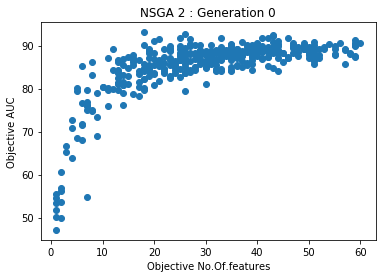

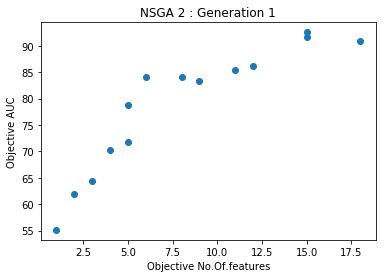

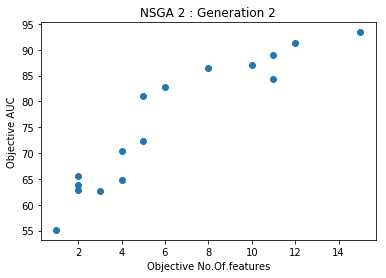

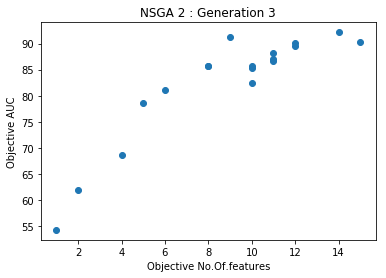

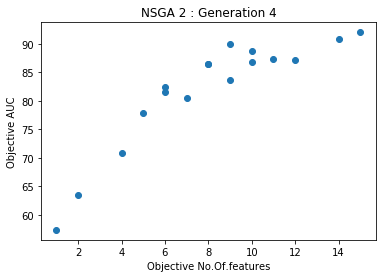

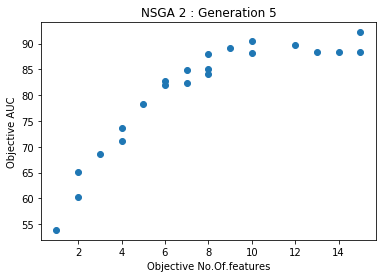

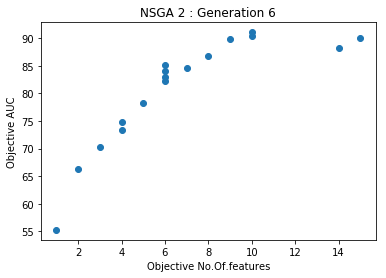

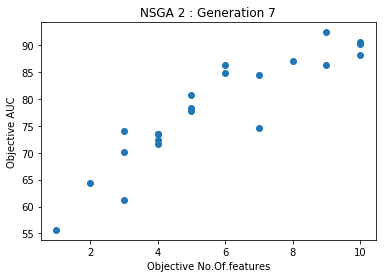

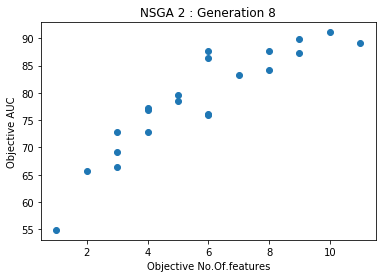

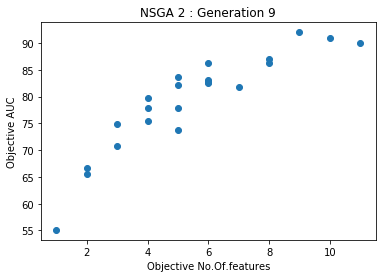

Generation 10 out of 50 


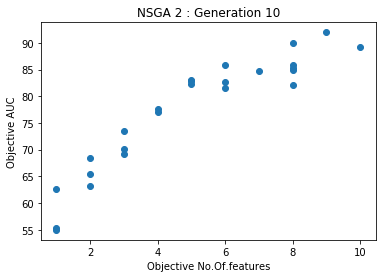

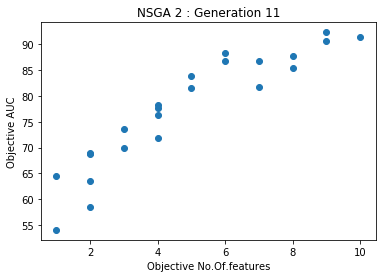

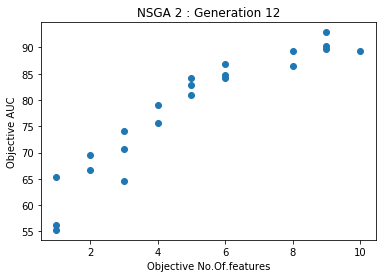

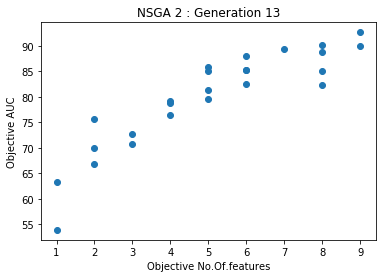

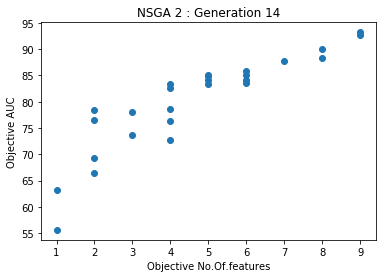

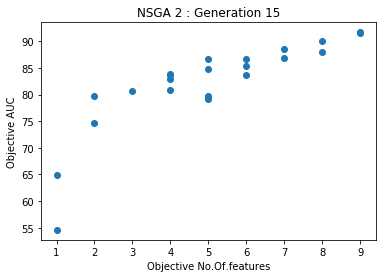

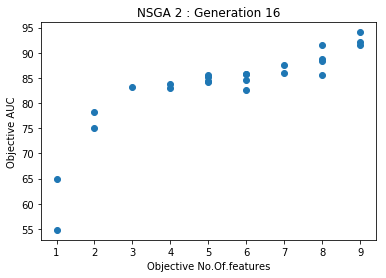

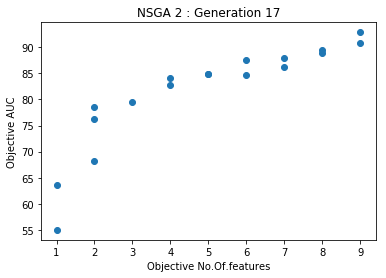

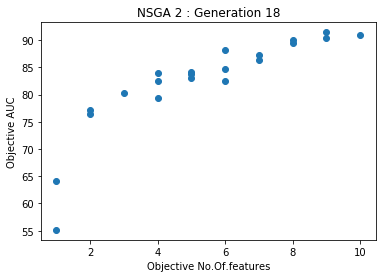

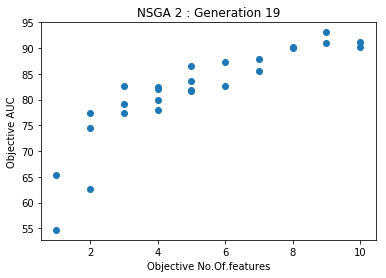

Generation 20 out of 50 


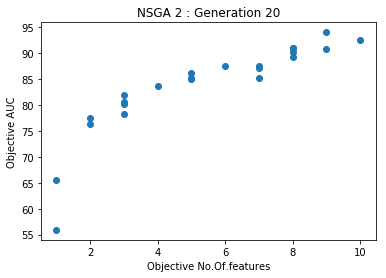

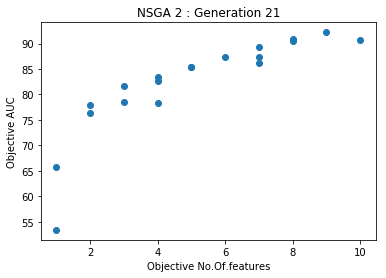

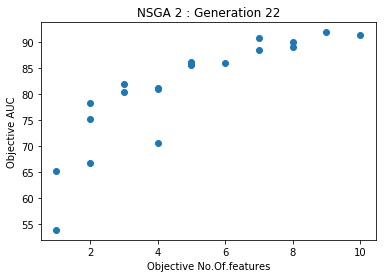

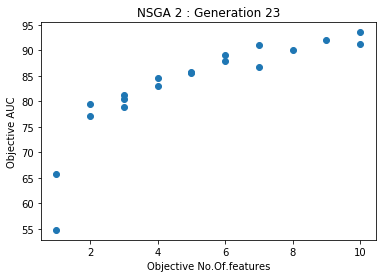

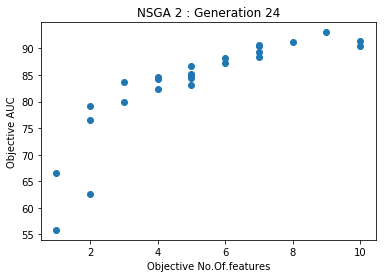

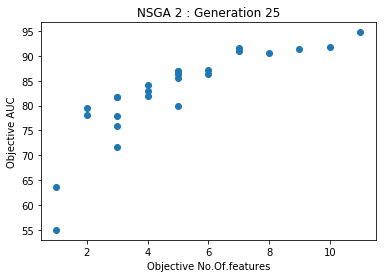

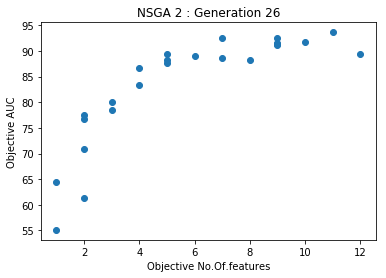

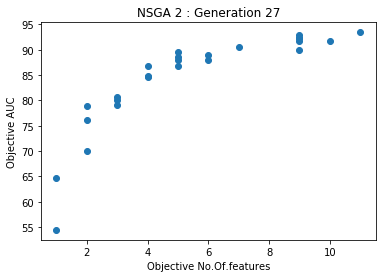

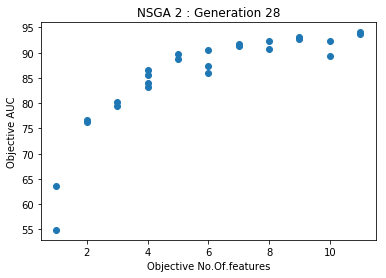

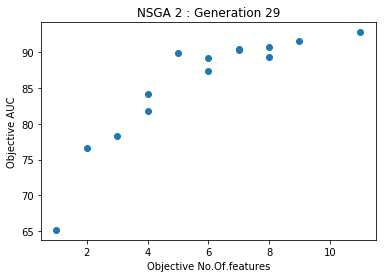

Generation 30 out of 50 


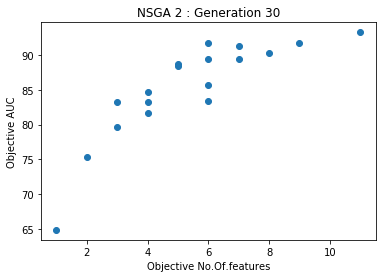

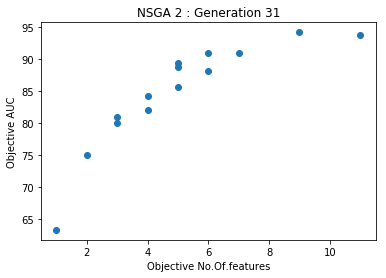

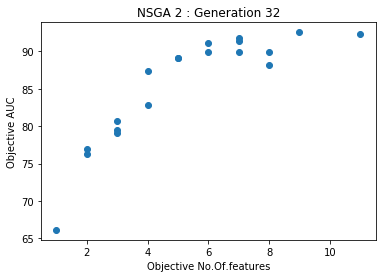

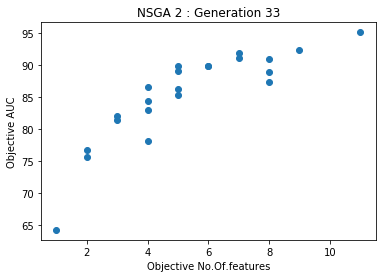

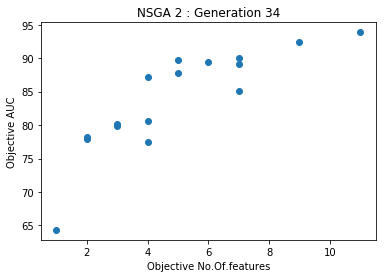

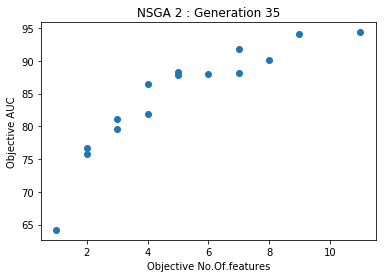

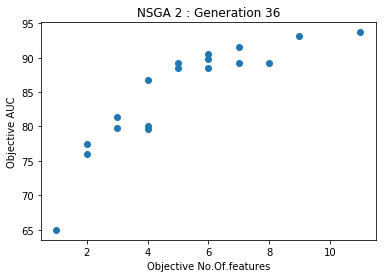

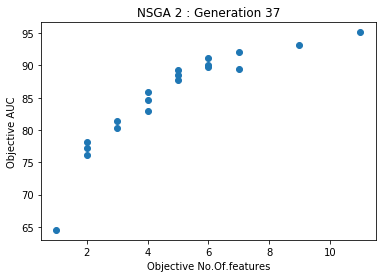

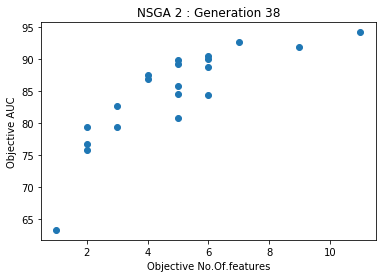

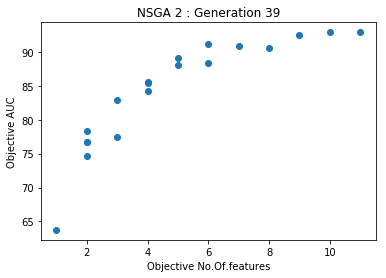

Generation 40 out of 50 


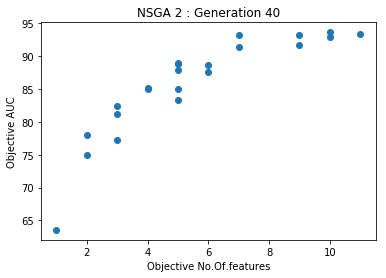

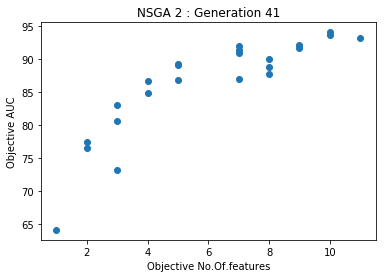

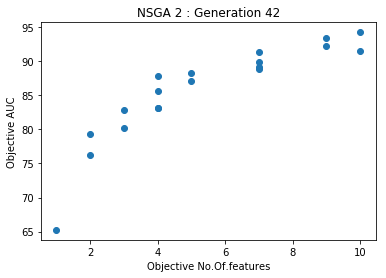

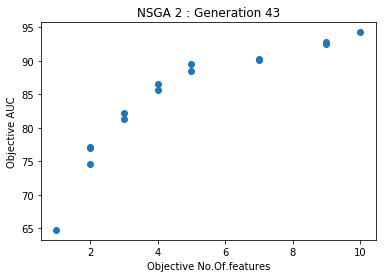

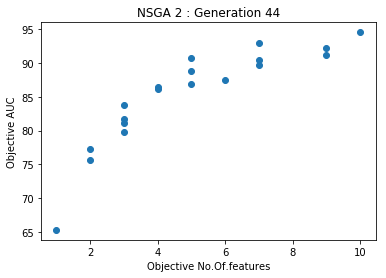

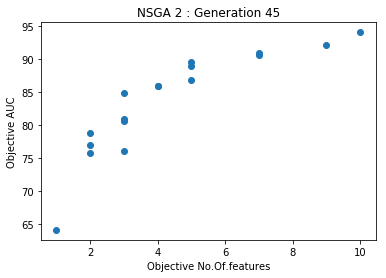

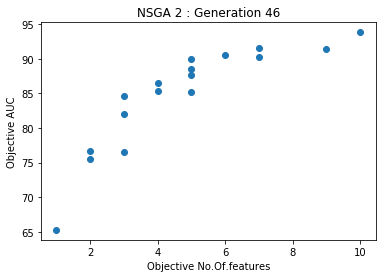

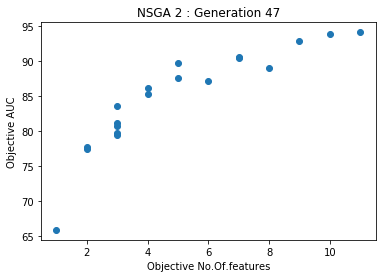

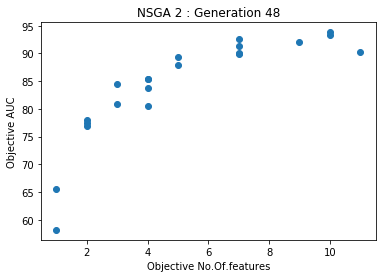

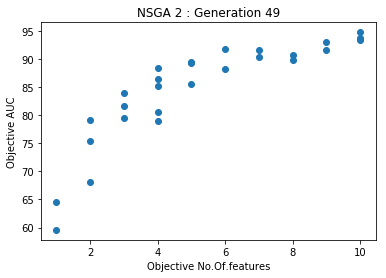

Selected Population : 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 

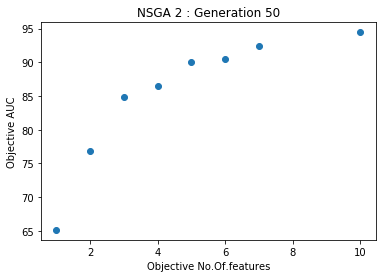

In [5]:
# Set general parameters
starting_population_size = 200
maximum_generation = 50
minimum_population_size = 10
maximum_population_size = 30

# Create starting population
population = ngsa2.create_population(starting_population_size, chromosome_length)
population = np.unique(population, axis=0)
# Now we'll go through the generations of genetic algorithm

for generation in range(maximum_generation):

    if generation %10 == 0:
        print ('Generation {} out of {} '.format(generation,maximum_generation))
    # Breed
    population = ngsa2.breed_population(population)
    
    # Score population
    population,scores = ngsa2.score_population(df,Y,population)
    
    # Build pareto front
    population = ngsa2.build_pareto_population(
            population, scores, minimum_population_size, maximum_population_size)
    
    ngsa2.plot_2d_paretofront(scores,generation)


# Get final pareto front
population,scores = ngsa2.score_population(df,Y,population)
population_ids = np.arange(population.shape[0]).astype(int)
pareto_front = ngsa2.identify_pareto(scores, population_ids)
population = population[pareto_front, :]
scores = scores[pareto_front]

#Selected Population
print("Selected Population : \n",population)
print("Scores", scores)
ngsa2.plot_2d_paretofront(scores,generation+1)